For the island-based qubit we have the Hamiltonian:
$$\mathcal{\hat{H}}_q = 4E_C(\hat{N}-N_{ext})^2 - E_j \cos \hat{\varphi}$$
For this Hamiltonian we choose the charge basis ${|n\rangle}$, $n \in \mathbb{Z}$, where:
$$n = -N, -N+1, ... 0, ..., N-1,N$$
$$\hat{N}|n\rangle = n |n\rangle$$
With a dimension $d=2N+1$
Applying to the Hamiltonian:
$$(\hat{N}-N_{ext})^2|n\rangle = (m-N_{ext})^2|n\rangle$$
The matrix elements:

$$\langle m|(\hat{N}-N_{ext})^2|n\rangle = (n-N_{ext})^2 \langle m|n\rangle = (n-N_{ext})^2 \delta_{m,n}$$
If $n=m$:
$$\langle m|4E_C(\hat{N}-N_{ext})^2|n\rangle = 4E_C(n-N_{ext})^2$$
If $n\neq m:$
$$\langle m|4E_C(\hat{N}-N_{ext})^2|n\rangle = 0$$
Now consider $\cos\hat{\varphi} = \frac{1}{2}(e^{+i\hat{\varphi}}+e^{-i\hat{\varphi}})$, where
$$e^{+i\hat{\varphi}}|n\rangle = |n+1\rangle \rightarrow \langle m|e^{+i\hat{\varphi}}|n\rangle = \delta_{m,n+1}$$
$$e^{-i\hat{\varphi}}|n\rangle = |n-1\rangle \rightarrow \langle m|e^{-i\hat{\varphi}}|n\rangle = \delta_{m,n-1}$$
Then $-\frac{E_j}{2}(e^{+i\hat{\varphi}}+e^{-i\hat{\varphi}})$ puts $-\frac{E_J}{2}$ in the adjacent diagonals.
Finally we have:
$$H_{mn} = 4E_C(n-N_{ext})^2\delta_{m,n} - \frac{E_J}{2}(\delta_{m,n+1}+\delta_{m,n-1})$$
Once we have this matrix, we should diagonalize it to get the eigenvalues and eigenstates and plot the quantities desired.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
# --------- Plot style ----------
def use_latex_style(usetex=True):
    # If LaTeX not installed, usetex=False
    mpl.rcParams.update({
        "text.usetex": usetex,
        "font.family": "serif",
        "font.size": 10,
        "axes.labelsize": 10,
        "axes.titlesize": 10,
        "legend.fontsize": 9,
        "xtick.labelsize": 9,
        "ytick.labelsize": 9,
        "axes.linewidth": 0.8,
        "lines.linewidth": 1.6,
        "figure.dpi": 150,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",
        "pdf.fonttype": 42,
        "ps.fonttype": 42
    })

In [24]:
class ChargeBasisTransmon:
    def __init__(self, EC:float, EJ:float, Nmax=10) -> None:
        self.EC = EC
        self.EJ = EJ
        self.n = np.arange(-Nmax,Nmax+1,dtype=float)
        self.dim = len(self.n)

    def hamiltonian(self, N_ext):
        H = np.zeros((self.dim, self.dim),dtype=float)
        #diagonal
        for i, n in enumerate(self.n):
            H[i,i] = 4.0 * self.EC * (n - N_ext)**2
        #outside the diagonal
        for i in range(self.dim-1):
            H[i, i + 1] = -self.EJ / 2.0
            H[i + 1, i] = -self.EJ / 2.0
        return H

    #for the diagonalization
    def diagonalization(self,N_ext):
        H = self.hamiltonian(N_ext)
        eigen_values, eigen_states = np.linalg.eigh(H)
        return eigen_values, eigen_states

    def energy_spectrum(self, N_ext_array, n_levels=4):
        N_ext_array = np.asarray(N_ext_array,dtype=float)
        energies = np.zeros((n_levels, len(N_ext_array)),dtype=float)
        
        for j, N_ext in enumerate(N_ext_array):
            evals, _ = self.diagonalization(N_ext)
            energies[:, j] = evals[:n_levels]
        return energies

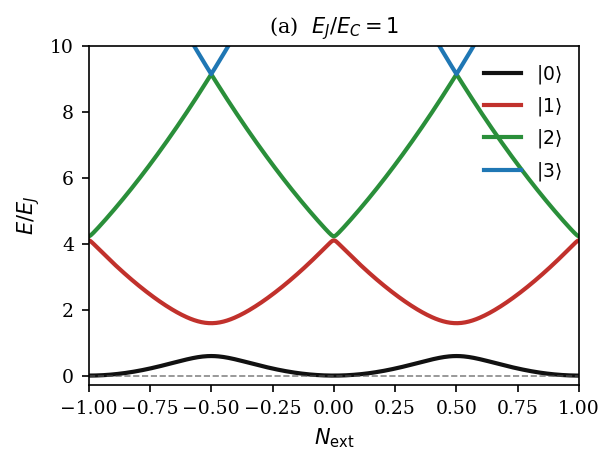

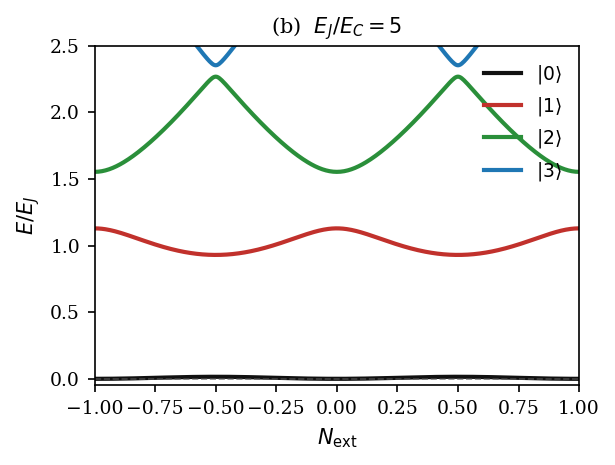

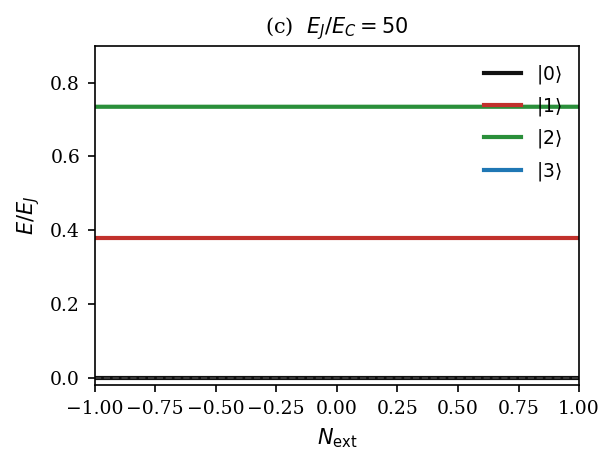

In [31]:

use_latex_style(usetex=False)

N_ext = np.linspace(-1.0, 1.0, 401)
ratios = [1, 5, 50]
panel_labels = ["(a)", "(b)", "(c)"]

EC = 1.0
n_levels = 4
level_labels = [r"$|0\rangle$", r"$|1\rangle$", r"$|2\rangle$", r"$|3\rangle$"]
level_colors = ["#111111", "#c1312c", "#2a8f3a", "#1f77b4"]
y_limits = {1: (-0.3, 10.0), 5: (-0.05, 2.5), 50: (-0.02, 0.9)}

for EJ_over_EC, panel in zip(ratios, panel_labels):
    EJ = EJ_over_EC * EC
    qubit = ChargeBasisTransmon(EC=EC, EJ=EJ, Nmax=10)
    E = qubit.energy_spectrum(N_ext, n_levels=n_levels)

    # Normalize by EJ and set the minimum of the ground state to zero
    E = E / EJ
    E -= E[0].min()

    fig, ax = plt.subplots(figsize=(4.2, 3.2))
    for level in range(n_levels):
        ax.plot(N_ext, E[level], label=level_labels[level], color=level_colors[level], lw=2.0)
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(*y_limits[EJ_over_EC])
    ax.axhline(0.0, color="#555555", linewidth=0.8, linestyle="--", alpha=0.7)
    ax.set_xlabel(r"$N_{\mathrm{ext}}$")
    ax.set_ylabel(r"$E/E_J$")
    ax.set_title(rf"{panel}  $E_J/E_C = {EJ_over_EC}$")
    ax.legend(frameon=False, loc="upper right")
    plt.tight_layout()
    plt.show()


Aproximating as a quantum harmonic oscillator we have the Hamiltonian:
$$\hat{\mathcal{H}}_q \approx 4E_C\hat{N}^2 + \frac{1}{2}E_J\hat{\varphi}^2$$

Since the energy levels are insensitive to $N_{ext}$, we ignore it.

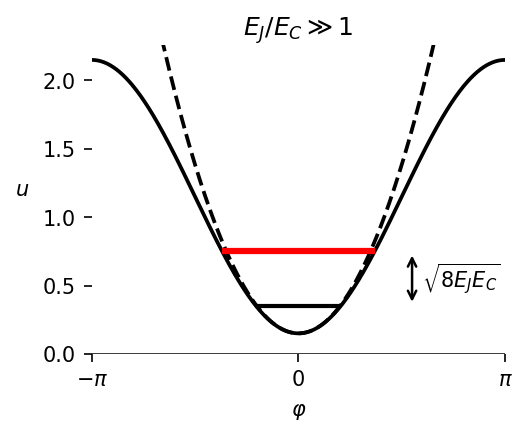

In [ ]:
EC = 0.02
EJ = 1.0
omega_p = np.sqrt(8.0 * EJ * EC)

phi = np.linspace(-np.pi, np.pi, 400)

U_cos = EJ * (1 - np.cos(phi))

phi_ho = np.linspace(-0.8*np.pi, 0.8*np.pi, 400)
U_ho   = 0.5 * EJ * phi_ho**2

E0 = 0.5 * omega_p
E1 = 1.5 * omega_p

delta = 0.15
U_cos_s = U_cos + delta
U_ho_s  = U_ho  + delta
E0_s    = E0    + delta
E1_s    = E1    + delta

mask = (phi >= 0) & (phi <= np.pi)
phi_right = phi[mask]
U_right   = U_cos_s[mask]

phi_E0 = np.interp(E0_s, U_right, phi_right)
phi_E1 = np.interp(E1_s, U_right, phi_right)

fig, ax = plt.subplots(figsize=(3.4, 2.8), dpi=150, constrained_layout=True)

ax.plot(phi,    U_cos_s, lw=1.8, color="black")
ax.plot(phi_ho, U_ho_s,  lw=1.8, ls="--", color="black")

ax.axhline(0, color="black", lw=1.2)

ax.hlines(E0_s, -phi_E0,  phi_E0, colors="black", lw=2.0)
ax.hlines(E1_s, -phi_E1,  phi_E1, colors="red",   lw=3.0)

# √(8EJEC)
ax.annotate(
    "",
    xy=(0.55*np.pi, E1_s), xytext=(0.55*np.pi, E0_s),
    arrowprops=dict(arrowstyle="<->", lw=1.2, color="black")
)
ax.text(
    0.60*np.pi, 0.5*(E0_s+E1_s),
    r"$\sqrt{8E_JE_C}$",
    ha="left", va="center"
)

ax.set_xlim(-np.pi, np.pi)
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])

for side in ["top", "right", "left", "bottom"]:
    ax.spines[side].set_visible(False)

ymax = U_cos_s.max()
ax.set_ylim(0, 1.05*ymax)
ax.annotate(
    "",
    xy=(-1.12*np.pi, ymax*0.98), xytext=(-1.12*np.pi, 0),
    arrowprops=dict(arrowstyle="->", lw=1.2, color="black")
)

ax.set_xlabel(r"$\varphi$", labelpad=6)
ax.set_ylabel(r"$u$", rotation=0, labelpad=10)
ax.set_title(r"$E_J/E_C \gg 1$", pad=4)

ax.tick_params(axis="both", which="both", length=4, width=0.8, direction="out")
ax.grid(False)

plt.show()